In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Data Understanding

In [3]:
df = pd.read_csv('DATA/Mall_Customers.csv')
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Preprocessing

In [6]:
x = df.drop(['CustomerID', 'Gender', 'Age'], axis=1)
x = x.values


Text(0, 0.5, 'Inertia')

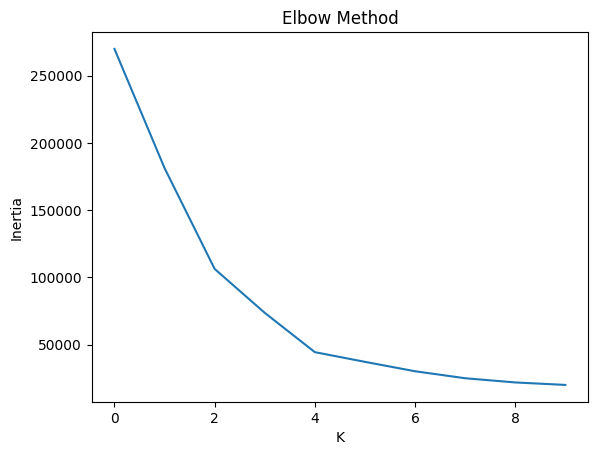

In [7]:
inertia = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

plt.title('Elbow Method')
plt.plot(inertia)
plt.xlabel('K')
plt.ylabel('Inertia')


# Modelling

In [8]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
y = kmeans.fit_predict(x)

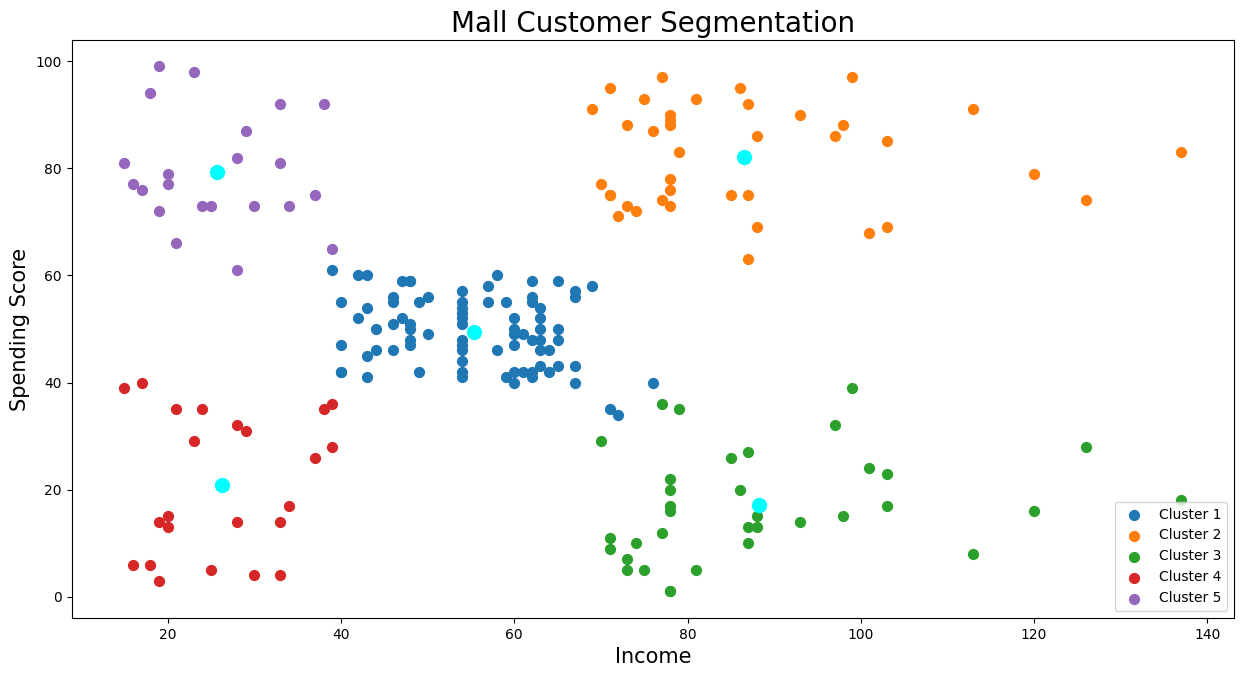

In [9]:
plt.figure(figsize=(15,7.5))
plt.scatter(x[y==0,0], x[y==0,1], label='Cluster 1', s=50, )
plt.scatter(x[y==1,0], x[y==1,1], label='Cluster 2', s=50, )
plt.scatter(x[y==2,0], x[y==2,1], label='Cluster 3', s=50, )
plt.scatter(x[y==3,0], x[y==3,1], label='Cluster 4', s=50, )
plt.scatter(x[y==4,0], x[y==4,1], label='Cluster 5', s=50, )

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan')

plt.title('Mall Customer Segmentation', fontsize=20)
plt.xlabel('Income', fontsize=15)
plt.ylabel('Spending Score', fontsize=15)
plt.legend()


# Evaluation

In [10]:
score = silhouette_score(x, kmeans.labels_)
score

0.553931997444648